In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
import torch
from torch_geometric.nn import conv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from gae import get_vanilla_model
from data import One_RNA_Dataset, PairDataset
from utils import plot_correlation_prediction

# On Dataset for highly probable secondary structure

In [26]:
data = One_RNA_Dataset("../data/test")
pair_dataset = PairDataset(data, data, sample=True, remove_random=True, seed=11)

100%|██████████| 63/63 [00:01<00:00, 35.21it/s]


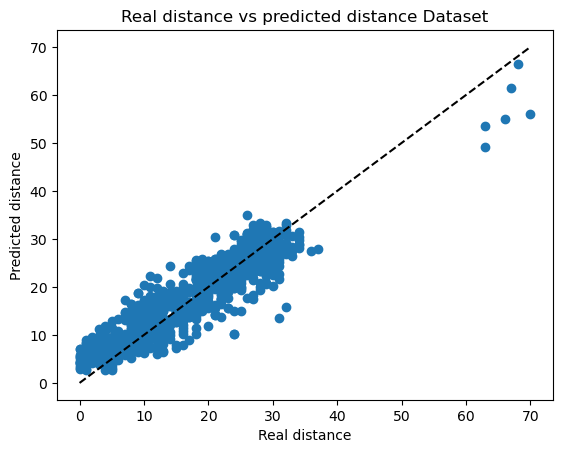

In [28]:
# Load model

model = get_vanilla_model(64, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv64/best_model.pt"))
fig = plot_correlation_prediction(model, pair_dataset, "Dataset")

  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:01<00:00, 40.73it/s]


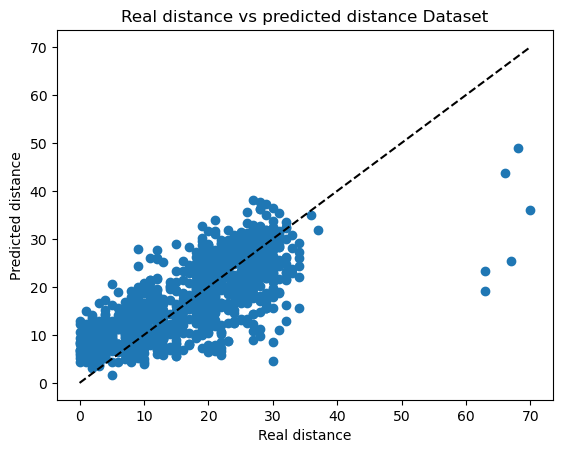

In [29]:
# Load model

model = get_vanilla_model(32, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv/best_model.pt"))
fig = plot_correlation_prediction(model, pair_dataset, "Dataset")

  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:02<00:00, 28.49it/s]


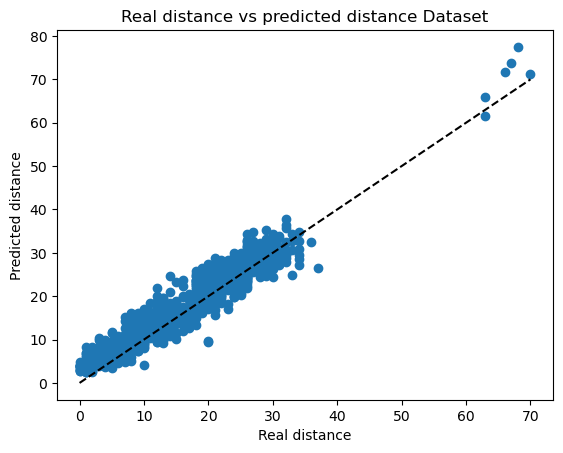

In [30]:
# Load model

model = get_vanilla_model(256, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv256/best_model.pt"))
fig, real_distancesL2 , predicted_distancesL2 = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [31]:
errorL2 = np.abs(real_distancesL2 - predicted_distancesL2)

In [32]:
print("Mean error: ", np.mean(errorL2))
print("Median error: ", np.median(errorL2))
print("Max error: ", np.max(errorL2))
print("Min error: ", np.min(errorL2))
print("Variation: ", np.var(errorL2))

Mean error:  2.6249511
Median error:  2.3014126
Max error:  10.643974
Min error:  0.0021591187
Variation:  3.5139349


  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:02<00:00, 30.03it/s]


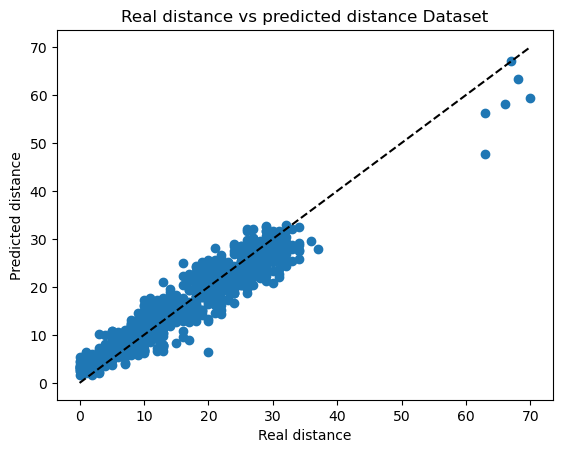

In [33]:
# Load model

model = get_vanilla_model(256, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv256L1/best_model.pt"))
fig, real_distances , predicted_distances = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [34]:
error = np.abs(real_distances - predicted_distances)

In [35]:
print("Mean error: ", np.mean(error))
print("Median error: ", np.median(error))
print("Max error: ", np.max(error))
print("Min error: ", np.min(error))
print("Variation: ", np.var(error))

Mean error:  2.3730242
Median error:  2.0442739
Max error:  15.22337
Min error:  0.0010910034
Variation:  3.4525878


/tmp/ipykernel_2699962/1653742877.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(error, shade=True, color="r", label="L1")
/tmp/ipykernel_2699962/1653742877.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(errorL2, shade=True, color="b", label="L2")


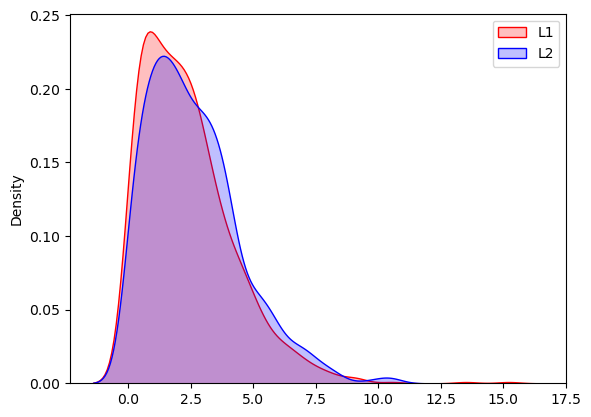

In [36]:
sns.kdeplot(error, shade=True, color="r", label="L1")
sns.kdeplot(errorL2, shade=True, color="b", label="L2")
plt.legend()

/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


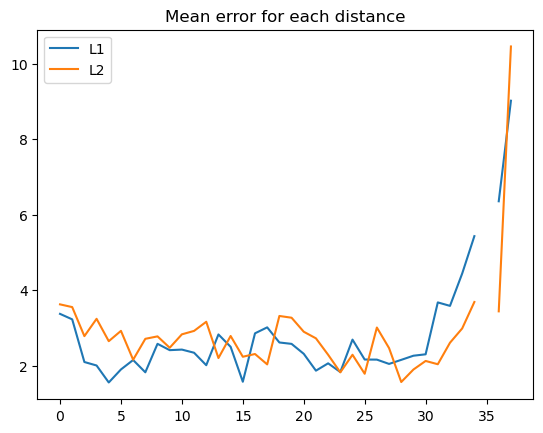

In [37]:
# Mean error for each distance
mean_error = np.zeros(50)
for i in range(50):
    mean_error[i] = np.mean(error[real_distances == i])
plt.plot(mean_error, label="L1")
# Mean error for each distance
mean_errorL2 = np.zeros(50)
for i in range(50):
    mean_errorL2[i] = np.mean(errorL2[real_distancesL2 == i])
plt.plot(mean_errorL2, label="L2")
plt.legend()
plt.title("Mean error for each distance")
plt.show()


/users/eleves-b/2021/thomas.loux/.local/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:02<00:00, 29.27it/s]


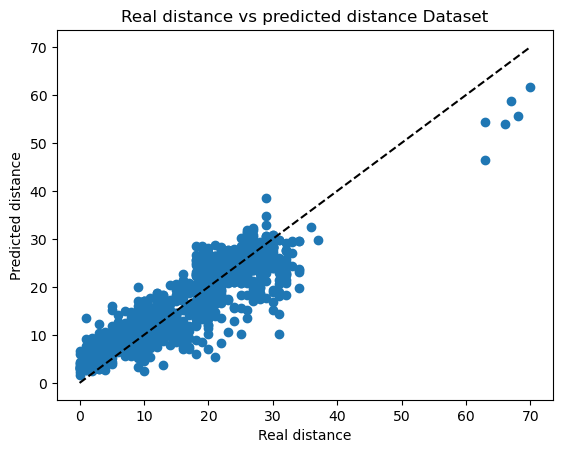

In [38]:
# Load model

model = get_vanilla_model(256, conv.GCNConv)
model.load_state_dict(torch.load("../models/gcnconv256L1/best_model.pt"))
fig, real_distances , predicted_distances = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [39]:
error = np.abs(real_distances - predicted_distances)

In [40]:
print("Mean error: ", np.mean(error))
print("Median error: ", np.median(error))
print("Max error: ", np.max(error))
print("Min error: ", np.min(error))
print("Variation: ", np.var(error))

Mean error:  3.4881103
Median error:  2.9497335
Max error:  20.775381
Min error:  0.0040302277
Variation:  7.814714


# Model Train on diverse dataset

We show that the model trained on diverse dataset is rather good, although it tends to overestimate for small distances.
These models are way better on the diverse dataset (maybe due to the distribution of distance)

  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:02<00:00, 27.93it/s]


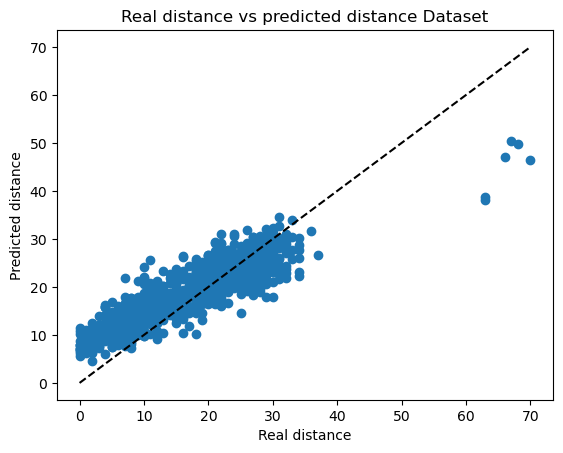

In [41]:
# Load model

model = get_vanilla_model(256, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv256L1withoutEdgeAttr60epoch/best_model.pt"))
fig, real_distances , predicted_distances = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [42]:
error = np.abs(real_distances - predicted_distances)

In [43]:
print("Mean error: ", np.mean(error))
print("Median error: ", np.median(error))
print("Max error: ", np.max(error))
print("Min error: ", np.min(error))
print("Variation: ", np.var(error))

Mean error:  4.335243
Median error:  4.001643
Max error:  24.87305
Min error:  0.002735138
Variation:  9.723642


# Is reconstruction better on diverse dataset?

In [56]:
data = One_RNA_Dataset("../data/test-better-sampling")
pair_dataset = PairDataset(data, data, sample=True, remove_random=True, seed=11)

  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:02<00:00, 28.35it/s]


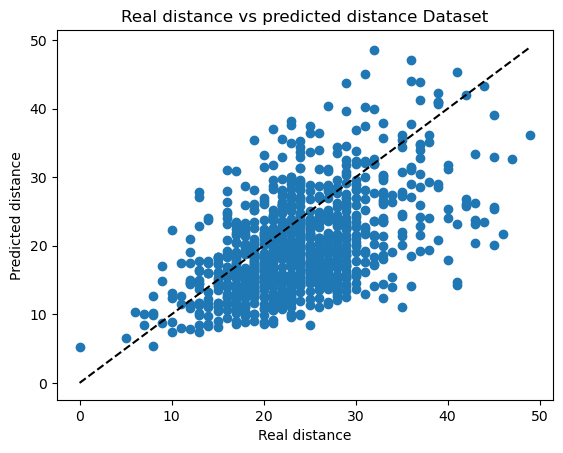

In [57]:
# Load model

model = get_vanilla_model(256, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv256L1withoutEdgeAttr60epochRecons/best_model.pt"))
fig, real_distances , predicted_distances = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [58]:
error = np.abs(real_distances - predicted_distances)

In [59]:
print("Mean error: ", np.mean(error))
print("Median error: ", np.median(error))
print("Max error: ", np.max(error))
print("Min error: ", np.min(error))
print("Variation: ", np.var(error))

Mean error:  6.252882
Median error:  5.348551
Max error:  26.744892
Min error:  0.002128601
Variation:  21.41959


  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:02<00:00, 28.47it/s]


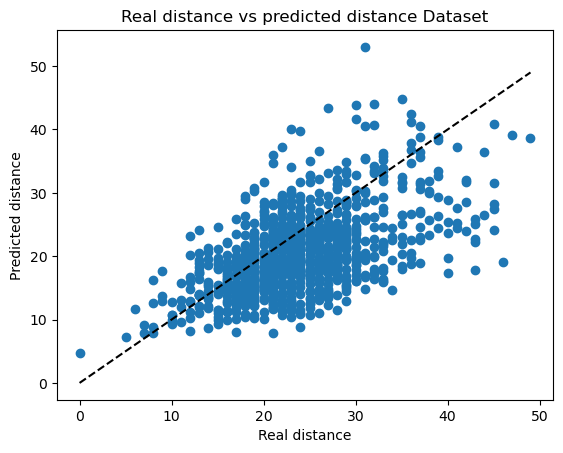

In [60]:
# Load model

model = get_vanilla_model(256, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv256L1withoutEdgeAttr30epochRecons/best_model.pt"))
fig, real_distances , predicted_distances = plot_correlation_prediction(model, pair_dataset, "Dataset")

The model with reconstruction seems to have a better generalization power.

In [61]:
error = np.abs(real_distances - predicted_distances)

In [62]:
print("Mean error: ", np.mean(error))
print("Median error: ", np.median(error))
print("Max error: ", np.max(error))
print("Min error: ", np.min(error))
print("Variation: ", np.var(error))

Mean error:  5.5321317
Median error:  4.489767
Max error:  26.925827
Min error:  0.011980057
Variation:  19.64465


  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:02<00:00, 25.36it/s]


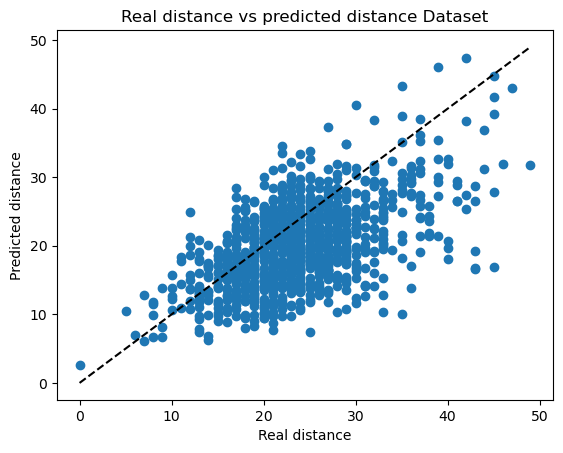

In [63]:
# Load model

model = get_vanilla_model(256, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv256/best_model.pt"))
fig, real_distancesL2 , predicted_distancesL2 = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [64]:
errorL2 = np.abs(real_distancesL2 - predicted_distancesL2)

In [65]:
print("Mean error: ", np.mean(errorL2))
print("Median error: ", np.median(errorL2))
print("Max error: ", np.max(errorL2))
print("Min error: ", np.min(errorL2))
print("Variation: ", np.var(errorL2))

Mean error:  5.694755
Median error:  4.89849
Max error:  28.127804
Min error:  0.0026416779
Variation:  19.916391


  0%|          | 0/63 [00:00<?, ?it/s]

100%|██████████| 63/63 [00:02<00:00, 27.36it/s]


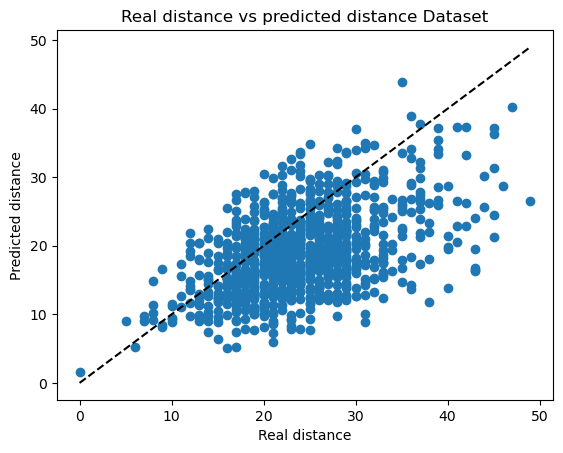

In [66]:
# Load model

model = get_vanilla_model(256, conv.ResGatedGraphConv)
model.load_state_dict(torch.load("../models/resgatedgraphconv256L1/best_model.pt"))
fig, real_distances , predicted_distances = plot_correlation_prediction(model, pair_dataset, "Dataset")

In [67]:
error = np.abs(real_distances - predicted_distances)

In [68]:
print("Mean error: ", np.mean(error))
print("Median error: ", np.median(error))
print("Max error: ", np.max(error))
print("Min error: ", np.min(error))
print("Variation: ", np.var(error))

Mean error:  6.385708
Median error:  5.3848844
Max error:  26.671099
Min error:  0.0038833618
Variation:  24.013721
